In [98]:
import pandas as pd

# Pacientes

In [99]:
# Importamos datos de pacientes.xlsx
datos_paciente = pd.read_excel('../data/pacientes.xlsx', sheet_name=0)
historia_cardiovascular = pd.read_excel('../data/pacientes.xlsx', sheet_name=1)
antitrombotico = pd.read_excel('../data/pacientes.xlsx', sheet_name=2)
otros_diagnosticos = pd.read_excel('../data/pacientes.xlsx', sheet_name=3)
factores_riesgo = pd.read_excel('../data/pacientes.xlsx', sheet_name=4)
habitos = pd.read_excel('../data/pacientes.xlsx', sheet_name=5)

In [100]:
antitrombotico.isna().sum()[antitrombotico.isna().sum() == 0]

Paciente    0
dtype: int64

In [101]:
# Importamos datos de eventos.xlsx
sangrado = pd.read_excel('../data/eventos.xlsx', sheet_name=0)
trombotico = pd.read_excel('../data/eventos.xlsx', sheet_name=1)

### Datos paciente

In [102]:
datos_paciente.isna().sum()

Edad        0
Paciente    0
Sexo        0
dtype: int64

### Historia cardiovascular

In [103]:
historia_cardiovascular.isna().sum(axis='columns')[historia_cardiovascular.isna().sum(axis='columns') >= historia_cardiovascular.shape[1]-2].index.to_list()


[]

In [104]:
(historia_cardiovascular.isna().sum()[historia_cardiovascular.isna().sum() > 0]/historia_cardiovascular.shape[0]*100).sort_values()

Max valor P. Sistólica                            33.333333
Hypertensión controlada                           33.333333
Medicamento Antihipertensivo                      34.782609
Arritmia auricular                                43.478261
Muerte súbita cardíaca                            43.478261
Taquicardia paroxística supraventicular           43.478261
Taquicardia ventricular                           43.478261
Ablación                                          44.927536
Tipo                                              71.014493
Etiología                                         71.014493
NYHA                                              71.014493
Fracción de Eyección del Ventrículo Izquierdo     71.014493
Ingurgitación de vena yugular                     71.014493
Presencia de crepitantes                          71.014493
Hipertensión pulmonar                             71.014493
Transplante cardíaco                              72.463768
Resincronización                        

In [105]:
historia_cardiovascular.isna().sum()[historia_cardiovascular.isna().sum() == 0]

Paciente                          0
Hipertensión arterial             0
Valvulopatía                      0
Enfermedad coronaria              0
Enfermedad aórtica                0
Enfermedad carótidea              0
Enfermedad vascular periférica    0
Arritmias                         0
Insuficiencia cardíaca            0
Miocardiopatía                    0
dtype: int64

#### Tipops enfermedades:
1. Hipertersión arterial
   - Max valor P. Sistólica
   - Hypertensión controlada
   - Medicamento Antihipertensivo
   - 
2. Enfermedad coronaria
   - Tipo
   - Cuantos?
   - Tipo de intervencion
3. Arritmias
    - Arritmia auricular
    - Muerte súbita cardíaca                            
    - Taquicardia paroxística supraventicular           
    - Taquicardia ventricular                           
    - Ablación
4. Insuficiencia cardíaca
    - Etiología                                         
    - NYHA                                              
    - Fracción de Eyección del Ventrículo Izquierdo     
    - Ingurgitación de vena yugular                     
    - Presencia de crepitantes                          
    - Hipertensión pulmonar                             
    - Transplante cardíaco                              
    - Resincronización
5. Miocardiopatía
6. Enfermedad vascular periférica
7. Valvulopatía
8. Enfermedad aórtica 
9. Enfermedad carótidea

In [106]:
limpio = historia_cardiovascular.copy()

limpio['Valvulopatía'] = historia_cardiovascular['Tipo de valvulopatía'].fillna('NO')
limpio['Miocardiopatía'] = historia_cardiovascular['Tipo de cardiomiopatía'].fillna('NO')
def limpiar_carotidea(x):
    if x['Enfermedad carótidea'] == 'NO': 
        res = x['Enfermedad carótidea'] 
    else:
        if x['Cirugía.1'] == 'YES':
            res = 'Cirugía'
        else:
            res = 'Sin cirugía'
    return res

limpio['Enfermedad carótidea'] = historia_cardiovascular.apply(limpiar_carotidea, axis=1)

def limpiar_aortica(x):
    if x['Enfermedad aórtica'] == 'NO': 
        res = x['Enfermedad aórtica'] 
    else:
        if x['Cirugía'] == 'YES':
            res = 'Cirugía'
        else:
            res = 'Sin cirugía'
    return res

limpio['Enfermedad aórtica'] = historia_cardiovascular.apply(limpiar_aortica, axis=1)

limpio.drop(['Tipo de valvulopatía', 'Tipo de cardiomiopatía','Fecha del transplante',
             'Fecha de la resincronización', 'Cirugía','Cirugía.1'], axis='columns', inplace=True)
limpio.to_csv('../data/historia_cardiovascular_limpio.csv')

In [107]:
limpio.head(6)

,Paciente,Hipertensión arterial,Max valor P. Sistólica,Hypertensión controlada,Medicamento Antihipertensivo,Valvulopatía,Enfermedad coronaria,Tipo,Cuantos?,Tipo de intervencion,...,Insuficiencia cardíaca,Etiología,NYHA,Fracción de Eyección del Ventrículo Izquierdo,Hipertensión pulmonar,Presencia de crepitantes,Ingurgitación de vena yugular,Transplante cardíaco,Resincronización,Miocardiopatía
0,UUMVLL1ZE5,YES,180.0,YES,YES,NO,NO,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
1,F1G3JGJUK8,YES,160.0,YES,YES,IM,YES,NaN,NaN,NaN,...,YES,ISCHEMIC,CLASS_2,51.0,NO,NO,NO,NO,NO,NO
2,LARERARYLK,NO,NaN,NaN,NaN,NO,NO,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
3,EFPKQPJUK2,YES,130.0,YES,YES,IM,NO,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
4,SVFI5UM8L9,YES,148.0,YES,YES,NO,YES,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
5,S10Q6HFVAK,YES,170.0,NO,NaN,NO,YES,SCA,2.0,NaN,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO


### Antitromboticos

In [108]:
filas_vacios = antitrombotico.isna().sum(axis='columns')[antitrombotico.isna().sum(axis='columns') >= antitrombotico.shape[1]-2].index.to_list()
filas_vacios

[9]

In [109]:
antitrombotico[antitrombotico['Paciente'] == '7IZPLD5RU4'].isna().sum(axis='columns')

9    22
dtype: int64

In [110]:
(antitrombotico.isna().sum()[antitrombotico.isna().sum() > 0]/antitrombotico.shape[0]*100).sort_values()

Se ha aplicado alguna guía clínica para la definición del tratamiento antitrombótico?      1.428571
Se le ha prescrito anticoagulante?                                                         1.428571
Plan terapeutico antiagregante 1                                                           1.428571
Numero de antiagregantes                                                                   1.428571
Se le ha prescrito algún antiagregante?                                                    1.428571
Antiagregante 2                                                                            1.428571
Plan terapeutico antiagregante 2                                                           1.428571
Antiagregante 1                                                                            1.428571
Plan terapeutico del anticoagulante                                                        8.571429
Motivo                                                                                     8.571429


In [111]:
borrar = antitrombotico.isna().sum()[antitrombotico.isna().sum() == antitrombotico.shape[0]].index.to_list()
borrar += ['Otro tipo', 'Otro tipo de ACOD', 'Numero de meses']

In [112]:
antitrombotico_limpio = antitrombotico.copy()



def limpiar_anticoagulante(x):
    if x['Tipo de anticoagulante'] != 'OTHER': 
        res = x['Tipo de anticoagulante'] 
    else:
        res = x['Otro tipo']
    return res
antitrombotico_limpio['Tipo de anticoagulante'] = antitrombotico.apply(limpiar_anticoagulante,axis=1)

def limpiar_acod(x):
    if x['Tipo de ACOD'] != 'OTHER': 
        res = x['Tipo de ACOD'] 
    else:
        res = x['Otro tipo de ACOD']
    return res
antitrombotico_limpio['Tipo de ACOD'] = antitrombotico.apply(limpiar_acod,axis=1 )

def limpiar_terapeutico(x):
    if x['Plan terapeutico del anticoagulante'] != 'OTHER': 
        res = x['Plan terapeutico del anticoagulante'] 
    else:
        if x['Numero de meses'] == 1:
            res = str(int(x['Numero de meses']))+'_MONTH'
        else:
            res = str(int(x['Numero de meses']))+'_MONTHS'
    return res
antitrombotico_limpio['Plan terapeutico del anticoagulante'] = antitrombotico.apply(limpiar_terapeutico, axis=1)

antitrombotico_limpio.drop(borrar, axis='columns', inplace=True)
antitrombotico_limpio.drop(filas_vacios, axis='rows', inplace=True)
antitrombotico_limpio.to_csv('../data/antitrombotico_limpio.csv')

In [113]:
antitrombotico['Numero de meses'].dtype

dtype('float64')

### Otros diagnosticos

In [114]:
otros_diagnosticos.isna().sum()

Paciente                        0
Transtorno de la coagulación    0
Discrasia sanguínea             0
Diabetes                        0
Dislipdemia                     0
Enfermedad hepática             0
Cancer                          0
Anemia                          0
Enfermedad renal                0
dtype: int64

### Factores de riesgo

In [115]:
(factores_riesgo.isna().sum()[factores_riesgo.isna().sum() > 0]/factores_riesgo.shape[0]*100).sort_values()

Deambulación alterada                             1.492537
Estado mental                                     1.492537
Caidas previas conocidas                          2.985075
Toma algún medicamento presente en esta lista     2.985075
Deficit sensorial                                 5.970149
Tipo de consumo                                  94.029851
Riesgo de caída                                  97.014925
dtype: float64

In [116]:
factores_riesgo.isna().sum(axis='columns')[factores_riesgo.isna().sum(axis='columns') >= factores_riesgo.shape[1]-2].index.to_list()


[]

In [117]:
factores_riesgo_limpio = factores_riesgo.copy()

def limpiar_alcohol(x):
    if x['Consumo diario de alcohol'] == 'NO': 
        res = x['Consumo diario de alcohol'] 
    else:
        res = x['Tipo de consumo']
    return res

factores_riesgo_limpio['Consumo diario de alcohol'] = factores_riesgo.apply(limpiar_alcohol, axis='columns')
factores_riesgo_limpio.drop('Tipo de consumo', axis='columns',inplace=True)
factores_riesgo_limpio.to_csv('../data/factores_riesgo_limpio.csv')

### Hábitos

In [118]:
habitos.isna().sum()

Codígo                                     0
Actualizado en este seguimiento            0
Realiza control regular de la presión?     0
Minutos semanales de actividad aeróbica    0
Dieta Mediterránea                         0
dtype: int64

# Eventos

In [119]:
import numpy as np
import pandas as pd

In [120]:
# Importamos datos de eventos.xlsx
sangrado = pd.read_excel('../data/eventos.xlsx', sheet_name=0)
trombotico = pd.read_excel('../data/eventos.xlsx', sheet_name=1)

In [121]:
sangrado.isna().sum()[sangrado.isna().sum() == 0]


Paciente                             0
Numero  anticoagulantes              0
Numero  antiagregantes               0
ANTICOAGULANT_COUNT                  0
ANTIPLATELET_COUNT                   0
ANALGESIC_COUNT                      0
NON_STEROIDAL_INFLAMMATORY_COUNT     0
DIURETIC_COUNT                       0
OTHER_COUNT                          0
Caracterización de la hemorragia     0
Descenso de hemoglobina              0
Gravedad de la hemorragia (TIMI)     0
Gravedad de la hemorragia (GUSTO)    0
Gravedad de la hemorragia (BARC)     0
dtype: int64

In [122]:
trombotico.isna().sum()[trombotico.isna().sum() == 0]

Paciente                                                               0
Numero  anticoagulantes                                                0
Numero  antiagregantes                                                 0
ANTICOAGULANT_COUNT                                                    0
ANTIPLATELET_COUNT                                                     0
ANALGESIC_COUNT                                                        0
NON_STEROIDAL_INFLAMMATORY_COUNT                                       0
DIURETIC_COUNT                                                         0
OTHER_COUNT                                                            0
TYPE_THROMBOTIC_PRE                                                    0
¿El paciente ha sufrido un evento trombótico previo a la inclusión?    0
Tipo de evento trombótico                                              0
dtype: int64

No nulos

#### sangrado

In [123]:
sangrado.columns

Index(['Paciente', 'Numero  anticoagulantes', 'Numero  antiagregantes',
       'Otro medicamentos', 'ANTICOAGULANT_STRING', 'ANTICOAGULANT_COUNT',
       'ANTIPLATELET_STRING', 'ANTIPLATELET_COUNT', 'ANALGESIC_STRING',
       'ANALGESIC_COUNT', 'NON_STEROIDAL_INFLAMMATORY_STRING',
       'NON_STEROIDAL_INFLAMMATORY_COUNT', 'DIURETIC_STRING', 'DIURETIC_COUNT',
       'OTHER_STRING', 'OTHER_COUNT', 'Caracterización de la hemorragia',
       'Procedimientos terapéuticos', 'Descenso de hemoglobina',
       'Gravedad de la hemorragia (TIMI)', 'Gravedad de la hemorragia (GUSTO)',
       'Gravedad de la hemorragia (BARC)', 'Tipo de sangrado',
       '¿El paciente ha subido una trasfusión?'],
      dtype='object')

In [124]:
sangrado.nunique(axis=0)

Paciente                                  116
Numero  anticoagulantes                     2
Numero  antiagregantes                      3
Otro medicamentos                          48
ANTICOAGULANT_STRING                        3
ANTICOAGULANT_COUNT                         2
ANTIPLATELET_STRING                         5
ANTIPLATELET_COUNT                          3
ANALGESIC_STRING                            1
ANALGESIC_COUNT                             2
NON_STEROIDAL_INFLAMMATORY_STRING           1
NON_STEROIDAL_INFLAMMATORY_COUNT            2
DIURETIC_STRING                             1
DIURETIC_COUNT                              2
OTHER_STRING                               48
OTHER_COUNT                                17
Caracterización de la hemorragia            3
Procedimientos terapéuticos                 2
Descenso de hemoglobina                    17
Gravedad de la hemorragia (TIMI)            3
Gravedad de la hemorragia (GUSTO)           3
Gravedad de la hemorragia (BARC)  

In [125]:
# borramos las columnas con solo 1 valor
sangrado.drop(sangrado.columns[sangrado.nunique(axis=0)<=1],axis=1,inplace=True)

In [126]:
# contiene la misma información que la columna NON_STEROIDAL_INFLAMMATORY_STRING
sangrado.drop("NON_STEROIDAL_INFLAMMATORY_COUNT",inplace=True,axis=1)

# contiene la misma información que la columna ANTICOAGULANT_STRING
sangrado.drop('Numero  anticoagulantes',inplace=True,axis=1)

# contiene la misma información que la columna ANTIPLATELET_STRING
sangrado.drop('Numero  antiagregantes',inplace=True,axis=1)

# contiene la misma información que la columna ANTICOAGULANT_STRING
sangrado.drop('ANTICOAGULANT_COUNT',inplace=True,axis=1)

# contiene la misma información que la columna ANTIPLATELET_STRING
sangrado.drop('ANTIPLATELET_COUNT',inplace=True,axis=1)

# contiene la misma información que la columna ANALGESIC_STRING
sangrado.drop('ANALGESIC_COUNT',inplace=True,axis=1)

# contiene la misma información que la columna OTHER_STRING
sangrado.drop('Otro medicamentos',inplace=True,axis=1)

# contiene la misma información que la columna OTHER_STRING
sangrado.drop('OTHER_COUNT',inplace=True,axis=1)

# contiene su información en la columna OTHER_STRING
sangrado.drop('DIURETIC_COUNT',inplace=True,axis=1)


In [127]:
sangrado.columns

Index(['Paciente', 'ANTICOAGULANT_STRING', 'ANTIPLATELET_STRING',
       'OTHER_STRING', 'Caracterización de la hemorragia',
       'Procedimientos terapéuticos', 'Descenso de hemoglobina',
       'Gravedad de la hemorragia (TIMI)', 'Gravedad de la hemorragia (GUSTO)',
       'Gravedad de la hemorragia (BARC)', 'Tipo de sangrado',
       '¿El paciente ha subido una trasfusión?'],
      dtype='object')

In [128]:
sangrado

,Paciente,ANTICOAGULANT_STRING,ANTIPLATELET_STRING,OTHER_STRING,Caracterización de la hemorragia,Procedimientos terapéuticos,Descenso de hemoglobina,Gravedad de la hemorragia (TIMI),Gravedad de la hemorragia (GUSTO),Gravedad de la hemorragia (BARC),Tipo de sangrado,¿El paciente ha subido una trasfusión?
0,011WX6BRL5,NaN,AAS,NaN,SPONTANEOUS,NaN,0.0,MINOR,MILD,TYPE_2,DIGESTIVE_BLEEDING,NO
1,0E8PPG9DPF,NaN,NaN,NaN,SPONTANEOUS,NaN,0.0,MINOR,MILD,TYPE_2,DIGESTIVE_BLEEDING,NO
2,0FUB2HQF2A,AVK,"AAS,CLOPIDOGREL","BETABLOQUEANTE, IECA, ANTIACIDO, ESTATINA, ANT...",SPONTANEOUS,NaN,2.0,MINOR,MILD,TYPE_2,DIGESTIVE_BLEEDING,NO
3,0LJ8GLA054,NaN,AAS,"ANALGESIC, VITAMINAS",SPONTANEOUS,NaN,0.0,MINOR,MILD,TYPE_2,DIGESTIVE_BLEEDING,NO
4,0LJ8GLA054,AVK,"AAS,CLOPIDOGREL","ANALGESIC, DIURETIC, VITAMINAS, SEDANTE, BRONC...",THERAPY,ICP-CABG,0.0,MINOR,MILD,TYPE_2,OTHER,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Z0V1HTFHL6,AVK,"AAS,CLOPIDOGREL","NON_STEROIDAL_INFLAMMATORY, DIURETIC, HIERRO, ...",THERAPY,OTHER,0.0,MINOR,MILD,TYPE_2,OTHER,NO
156,Z6UIBG4PDS,AVK,"AAS,CLOPIDOGREL","DIURETIC, ANTIDIABETICO, BETABLOQUEANTE, CALCI...",THERAPY,ICP-CABG,0.0,MINOR,SEVERE,TYPE_2,OTHER,NO
157,ZUCGYT0MDD,NaN,AAS,NaN,SPONTANEOUS,NaN,0.0,MINOR,MILD,TYPE_2,OTHER,NO
158,ZWV75CPMJF,AVK,NaN,NaN,SPONTANEOUS,NaN,0.0,MINOR,MILD,TYPE_2,OTHER,NO


In [129]:
def nan_a_cero(x):
    if pd.isna(x):
        return 0
    else:
        return x

sangrado=sangrado.applymap(nan_a_cero)

C:\Users\alvar\AppData\Local\Temp\ipykernel_7228\3801008862.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sangrado=sangrado.applymap(nan_a_cero)


In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
# One-hot encoding de las columnas categóricas
sangrado_encoded = pd.get_dummies(sangrado[sangrado.columns[(sangrado.nunique(axis=0)<4).values]])

# Matriz de correlación
corr_matrix = sangrado_encoded.corr()


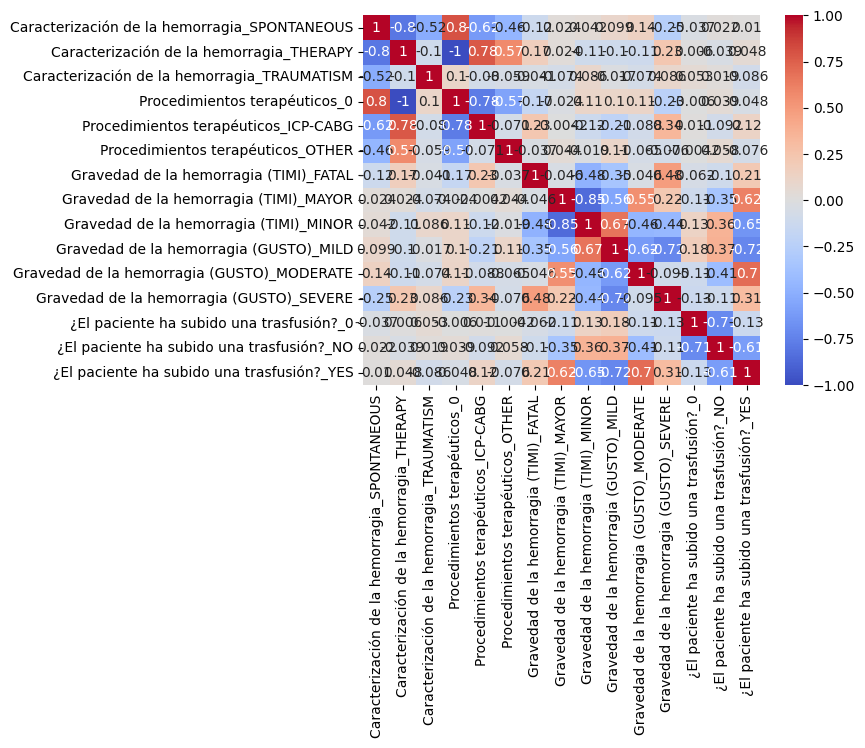

In [131]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [132]:
sangrado.to_csv("../data/sangrado_limpio.csv")

#### Trombotico

In [133]:
trombotico.nunique(axis=0)

Paciente                                                               105
Numero  anticoagulantes                                                  2
Numero  antiagregantes                                                   3
Otro medicamentos                                                       20
ANTICOAGULANT_STRING                                                     2
ANTICOAGULANT_COUNT                                                      2
ANTIPLATELET_STRING                                                      5
ANTIPLATELET_COUNT                                                       3
ANALGESIC_STRING                                                         1
ANALGESIC_COUNT                                                          2
NON_STEROIDAL_INFLAMMATORY_STRING                                        0
NON_STEROIDAL_INFLAMMATORY_COUNT                                         1
DIURETIC_STRING                                                          1
DIURETIC_COUNT           

In [134]:
# Definir las columnas que tienen solo un valor, excepto option3 que si contiene informacion
cols_a_borrar = [
    col for col in trombotico.columns 
    if trombotico[col].nunique() <= 1 and col != 'option3_THROMBOTIC_PRE'
]

# Eliminar esas columnas
trombotico.drop(columns=cols_a_borrar, inplace=True)


In [135]:
trombotico.columns

Index(['Paciente', 'Numero  anticoagulantes', 'Numero  antiagregantes',
       'Otro medicamentos', 'ANTICOAGULANT_STRING', 'ANTICOAGULANT_COUNT',
       'ANTIPLATELET_STRING', 'ANTIPLATELET_COUNT', 'ANALGESIC_COUNT',
       'DIURETIC_COUNT', 'OTHER_STRING', 'OTHER_COUNT', 'TYPE_THROMBOTIC_PRE',
       'Tipo de evento trombótico', 'Tipo de invervención',
       'option3_THROMBOTIC_PRE'],
      dtype='object')

In [136]:
# contiene la misma información que la columna ANTICOAGULANT_STRING
trombotico.drop('Numero  anticoagulantes',inplace=True,axis=1)

# contiene la misma información que la columna ANTICOAGULANT_STRING
trombotico.drop('ANTICOAGULANT_COUNT',inplace=True,axis=1)

# contiene la misma información que la columna ANTIPLATELET_STRING
trombotico.drop('Numero  antiagregantes',inplace=True,axis=1)

# contiene la misma información que la columna ANTIPLATELET_STRING
trombotico.drop('ANTIPLATELET_COUNT',inplace=True,axis=1)

# contiene la misma información que la columna OTHER_STRING
trombotico.drop('Otro medicamentos',inplace=True,axis=1)

# contiene la misma información que la columna OTHER_STRING
trombotico.drop('OTHER_COUNT',inplace=True,axis=1)

# contiene su información en la columna OTHER_STRING
trombotico.drop('DIURETIC_COUNT',inplace=True,axis=1)

# contiene su información en la columna OTHER_STRING
trombotico.drop('ANALGESIC_COUNT',inplace=True,axis=1)


In [137]:
trombotico=trombotico.applymap(nan_a_cero)

C:\Users\alvar\AppData\Local\Temp\ipykernel_7228\2499070363.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  trombotico=trombotico.applymap(nan_a_cero)


In [138]:
trombotico.columns

Index(['Paciente', 'ANTICOAGULANT_STRING', 'ANTIPLATELET_STRING',
       'OTHER_STRING', 'TYPE_THROMBOTIC_PRE', 'Tipo de evento trombótico',
       'Tipo de invervención', 'option3_THROMBOTIC_PRE'],
      dtype='object')

In [139]:
trombotico

,Paciente,ANTICOAGULANT_STRING,ANTIPLATELET_STRING,OTHER_STRING,TYPE_THROMBOTIC_PRE,Tipo de evento trombótico,Tipo de invervención,option3_THROMBOTIC_PRE
0,0LJ8GLA054,0,AAS,"ANALGESIC, VITAMINAS",THROMBOTIC_PRE,STROKE,0,0
1,0LJ8GLA054,0,AAS,"ANALGESIC, VITAMINAS",THROMBOTIC_PRE,MYOCARDIAL_INFARCT,ICP,0
2,0LJ8GLA054,0,AAS,"ANALGESIC, VITAMINAS",THROMBOTIC_PRE,MYOCARDIAL_INFARCT,BYPASS,AUTO_IMPORTED
3,0O4SQUG663,AVK,AAS,0,THROMBOTIC_PRE,STABLE_ANGINA,0,AUTO_IMPORTED
4,17S92LEG2L,0,0,ANTIACIDO,THROMBOTIC_PRE,STABLE_ANGINA,ICP,0
...,...,...,...,...,...,...,...,...
158,XMLVAJZMZG,0,AAS,0,THROMBOTIC_PRE,MYOCARDIAL_INFARCT,ICP,0
159,XMLVAJZMZG,0,AAS,0,THROMBOTIC_PRE,STABLE_ANGINA,BYPASS,AUTO_IMPORTED
160,XX691IYHFJ,0,0,0,THROMBOTIC_PRE,STABLE_ANGINA,ICP,AUTO_IMPORTED
161,Z3PYDQ5VAQ,ACOD,0,"DIURETIC, IECA, BETABLOQUEANTE, INSULINA, ANTI...",THROMBOTIC_PRE,SYSTEMIC_EMBOLISM,0,AUTO_IMPORTED


In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
# One-hot encoding de las columnas categóricas
trombotico_encoded = pd.get_dummies(trombotico[trombotico.columns[(trombotico.nunique(axis=0)<5).values]])

# Matriz de correlación
corr_matrix = trombotico_encoded.corr()


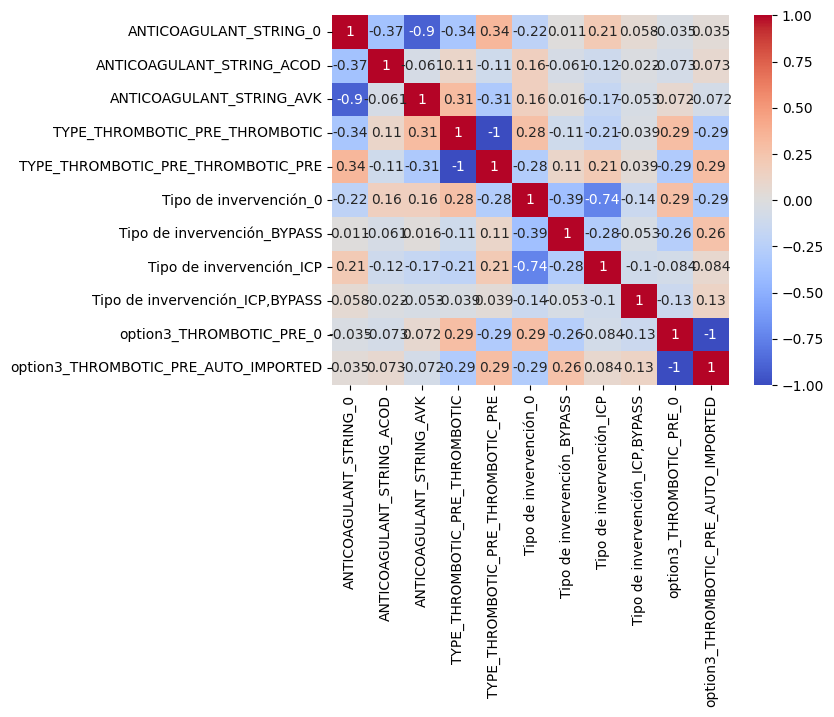

In [141]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [142]:
trombotico.to_csv("../data/trombotico_limpio.csv")

In [144]:
# Listas de pacientes
# Intersección: pacientes en ambos
pacientes_en_ambos = set(trombotico["Paciente"].unique()).intersection(set(sangrado["Paciente"].unique()))

print(f"Número de pacientes en ambos: {len(pacientes_en_ambos)}")
print(pacientes_en_ambos)


Número de pacientes en ambos: 71
{'CXICEZAWKG', 'DCM4B2GY93', 'WMSEPYGIPG', '5BWVA9M3Q1', '3B7YC7MLW8', 'MZ5E5Y0M5K', '1DFQP7031C', '0LJ8GLA054', 'GPTWHHH938', 'OWK83SJLN1', 'XIS94MCO60', 'IZ0P6OT1XA', 'EZ0TE1UO08', 'E59JQCNPV6', 'I0UBKJZ3SG', 'I8GR9E70SM', '58T8OAFW8R', '4H5LVKRVGG', 'J8IQCNZZ3K', 'CSB5ILUNFP', 'N45904P031', '1AM5WMG12P', 'EYHZSHLBT0', 'E0YOYV7CWU', 'GY8YJJVS6N', '59JOI4BLOJ', '4L2Q786LEB', '9PMGSUR6UT', 'EGEUVKO2DJ', 'KYRE9LUN4P', 'AL0ITDPSPZ', 'O8LIJUC3N9', 'SFHDVRP0OF', 'RT9F8R4FLG', 'NL7U2Z0VMJ', '2JLQX9NLA0', 'C92ETRTZ2Y', '5LN57B6L3B', 'B7414EIDEV', 'DNDVXZJXOF', 'IF5F85T6TK', 'UJSNB0FHVC', 'I0DSLZE9H3', '2ZTNLVRCVY', '17S92LEG2L', '6W7BXFEJXG', 'EGYVWWAO5B', 'KY6LV88GMN', 'BT22R42N0A', 'KTMKEHLMV8', 'LL3JXGXLB1', '644JERY5ZT', 'R99NODF6TH', 'S7SEEKWXF8', 'ZUCGYT0MDD', '1U6ERZS9B2', '58UUZ00UQT', 'FEJE0DOD8C', 'HXHXNPA0OR', 'N4VHFCOL6H', 'LSTVH2R8TN', 'IM29HB7QGZ', 'S10Q6HFVAK', 'VNLL6GV1GC', '1ATXIG35FL', 'RQCN11MK1L', 'B5QOD2SISO', 'CBQN457B5D', 'F1G3JGJUK8', 

In [146]:
# Primero filtramos los pacientes que están en ambos
pacientes_en_ambos = set(trombotico["Paciente"].unique()).intersection(set(sangrado["Paciente"].unique()))

# Luego hacemos un inner join filtrando solo esos pacientes
sangrado_en_ambos = sangrado[sangrado["Paciente"].isin(pacientes_en_ambos)]
trombotico_en_ambos = trombotico[trombotico["Paciente"].isin(pacientes_en_ambos)]

# Y ahora unimos ambos dataframes por 'Paciente'
# Si quieres todas las columnas de ambos datasets, haz un merge con suffixes para distinguir columnas con el mismo nombre
eventos_ambos = pd.merge(
    sangrado_en_ambos, 
    trombotico_en_ambos, 
    on="Paciente", 
    how="inner", 
    suffixes=("_sangrado", "_trombotico")
)

eventos_ambos

,Paciente,ANTICOAGULANT_STRING_sangrado,ANTIPLATELET_STRING_sangrado,OTHER_STRING_sangrado,Caracterización de la hemorragia,Procedimientos terapéuticos,Descenso de hemoglobina,Gravedad de la hemorragia (TIMI),Gravedad de la hemorragia (GUSTO),Gravedad de la hemorragia (BARC),Tipo de sangrado,¿El paciente ha subido una trasfusión?,ANTICOAGULANT_STRING_trombotico,ANTIPLATELET_STRING_trombotico,OTHER_STRING_trombotico,TYPE_THROMBOTIC_PRE,Tipo de evento trombótico,Tipo de invervención,option3_THROMBOTIC_PRE
0,0LJ8GLA054,0,AAS,"ANALGESIC, VITAMINAS",SPONTANEOUS,0,0.0,MINOR,MILD,TYPE_2,DIGESTIVE_BLEEDING,NO,0,AAS,"ANALGESIC, VITAMINAS",THROMBOTIC_PRE,STROKE,0,0
1,0LJ8GLA054,0,AAS,"ANALGESIC, VITAMINAS",SPONTANEOUS,0,0.0,MINOR,MILD,TYPE_2,DIGESTIVE_BLEEDING,NO,0,AAS,"ANALGESIC, VITAMINAS",THROMBOTIC_PRE,MYOCARDIAL_INFARCT,ICP,0
2,0LJ8GLA054,0,AAS,"ANALGESIC, VITAMINAS",SPONTANEOUS,0,0.0,MINOR,MILD,TYPE_2,DIGESTIVE_BLEEDING,NO,0,AAS,"ANALGESIC, VITAMINAS",THROMBOTIC_PRE,MYOCARDIAL_INFARCT,BYPASS,AUTO_IMPORTED
3,0LJ8GLA054,AVK,"AAS,CLOPIDOGREL","ANALGESIC, DIURETIC, VITAMINAS, SEDANTE, BRONC...",THERAPY,ICP-CABG,0.0,MINOR,MILD,TYPE_2,OTHER,NO,0,AAS,"ANALGESIC, VITAMINAS",THROMBOTIC_PRE,STROKE,0,0
4,0LJ8GLA054,AVK,"AAS,CLOPIDOGREL","ANALGESIC, DIURETIC, VITAMINAS, SEDANTE, BRONC...",THERAPY,ICP-CABG,0.0,MINOR,MILD,TYPE_2,OTHER,NO,0,AAS,"ANALGESIC, VITAMINAS",THROMBOTIC_PRE,MYOCARDIAL_INFARCT,ICP,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,WMSEPYGIPG,AVK,"CLOPIDOGREL,AAS","DIURETIC, ESTATINA, BETABLOQUEANTE, CALCIOANTA...",SPONTANEOUS,0,1.5,MINOR,MODERATE,TYPE_2,OTHER,YES,AVK,CLOPIDOGREL,"DIURETIC, ESTATINA, BETABLOQUEANTE, CALCIOANTA...",THROMBOTIC_PRE,STABLE_ANGINA,ICP,0
173,WMSEPYGIPG,AVK,0,0,SPONTANEOUS,0,0.0,MINOR,MILD,TYPE_2,OTHER,NO,AVK,CLOPIDOGREL,"DIURETIC, ESTATINA, BETABLOQUEANTE, CALCIOANTA...",THROMBOTIC_PRE,STABLE_ANGINA,ICP,0
174,XIS94MCO60,AVK,0,0,SPONTANEOUS,0,0.0,MINOR,MILD,TYPE_2,OTHER,NO,AVK,0,0,THROMBOTIC_PRE,STROKE,0,0
175,XIS94MCO60,AVK,0,0,SPONTANEOUS,0,0.0,MINOR,MILD,TYPE_2,INTRAOCULAR_BLEEDING,NO,AVK,0,0,THROMBOTIC_PRE,STROKE,0,0
